#### Example 3. Facial States

In [1]:
'''
prob: identify 11 different facial states
data: 165 images, of 15 people, each with 11 different states/emotions
'''

'\nprob: identify 11 different facial states\ndata: 165 images, of 15 people, each with 11 different states/emotions\n'

##### 1. Read and display a sample image

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# path
path = 'D:\\python\\pyforml\\week07_ann\\face_data\\'

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png' # file extension

In [4]:
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # height
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

165 77760 243 320


In [12]:
X = np.zeros((D, N))

# collect all data
count = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        count += 1

In [13]:
print(X.shape)

(77760, 165)


##### 2. Dimensionality reduction

In [14]:
# reduce dimensionality down to d=100
from sklearn.decomposition import PCA

# fit pca model to data
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X.T)
X_pca.shape

(165, 100)

In [16]:
X_pca[0]

array([-7671.50598124,   283.72994403, -2082.47177274, -1957.3351075 ,
       -4643.66027975,  2060.4130243 , -1865.23429498,  1051.75767853,
       -2763.15341378,  3509.22949276, -1685.47857875,   315.50344315,
         733.81907007, -1336.37726702,  -371.63101975, -1925.66773214,
         970.51495385,   132.27914571,  2146.18374002,  1366.26009307,
        -770.78650652,  1180.70589786,  -119.94052886,   387.4384518 ,
        2352.42354113,  3402.11854558,  -207.15917416,   294.37182499,
        1856.46098677,  1432.04825151,  -331.74554377, -1003.19083408,
       -1201.86249614,   683.8491802 ,   378.66898058,  1287.75517396,
        1426.26092499,  -576.83104376, -1363.35421931,  -175.51206436,
         -49.10041154,  2563.5230838 ,  -773.4419431 ,  -784.02496637,
        -193.67918841,  -503.8989396 ,    64.46941237,  -263.0327049 ,
         270.74265809, -1716.85769358,  -653.18265121,   916.17829649,
          38.99925953,  -165.52756312, -1123.0487281 ,  -104.60480475,
      

In [15]:
# reduce dimensionality down to d=100
from sklearn.decomposition import PCA

# fit pca model to data
pca = PCA(n_components=100)
pca.fit(X.T)

# projection matrix
U = pca.components_.T # orthogoanl bases U
print(U.shape)

(77760, 100)
PCA(n_components=100)


In [17]:
# project X to less-dimention sub-space: Z = U^T . X^
Xhat = np.zeros((D, N))
x_mean = X.mean(1)
for i in range(N):
    Xhat[:,i] = X[:,i] - x_mean[:]
    
# reduced dim. data Z (project of Xhat onto sub-space by Uk - bases)
Z = U.T.dot(Xhat)
Z.shape

(100, 165)

In [19]:
Z.T[0]

array([-7671.50598124,   283.72994403, -2082.47177274, -1957.3351075 ,
       -4643.66027976,  2060.41302424, -1865.23429622,  1051.75767704,
       -2763.15341155,  3509.22949417, -1685.4785778 ,   315.50350808,
         733.81899245, -1336.37736748,  -371.63102144, -1925.6676107 ,
         970.51468231,   132.27894504,  2146.18392577,  1366.26058838,
        -770.78754445,  1180.70378668,  -119.94391511,   387.43678512,
        2352.41586933,  3402.11047496,  -207.13957824,   294.37073569,
        1856.45588573,  1432.07626286,  -331.67734182, -1003.17078273,
       -1201.8955944 ,   683.83402743,   378.58102794,  1287.68358033,
        1426.24640695,  -576.70876146, -1363.49300876,  -175.46241237,
         -49.00931786,  2563.19331472,  -773.47115912,  -784.78308259,
        -193.85608084,  -504.47731262,    64.88091836,  -261.94949294,
         270.50798537, -1716.27464244,  -653.37464436,   915.0993785 ,
          37.74245704,  -165.49708732, -1124.73619235,  -102.32034048,
      

In [ ]:
# reshape new dataset after dim. reducing to be new images and save
path_save = 'D:\\python\\pyforml\\week07_neural-network\\face_data\\results\\'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

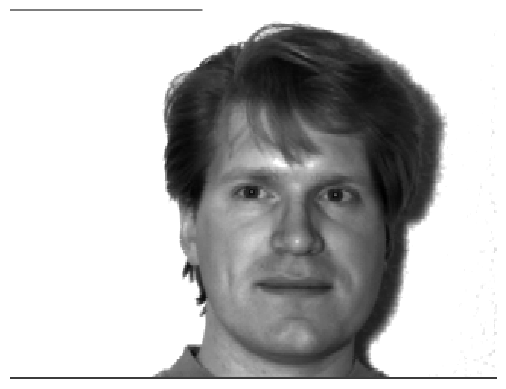

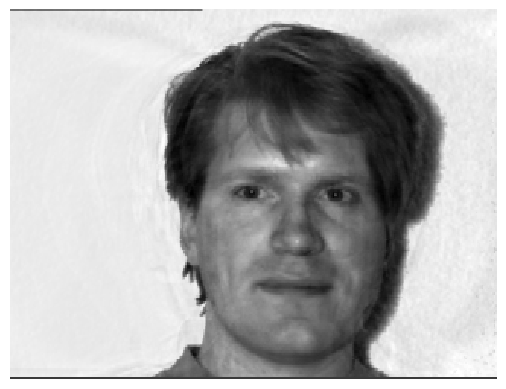

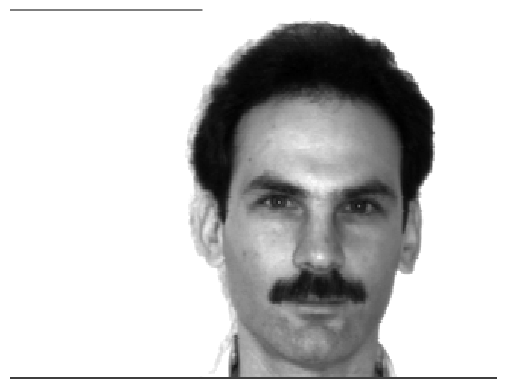

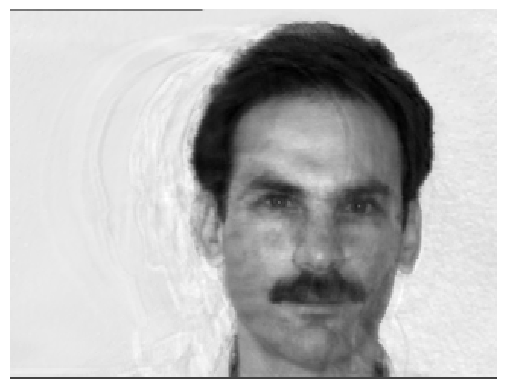

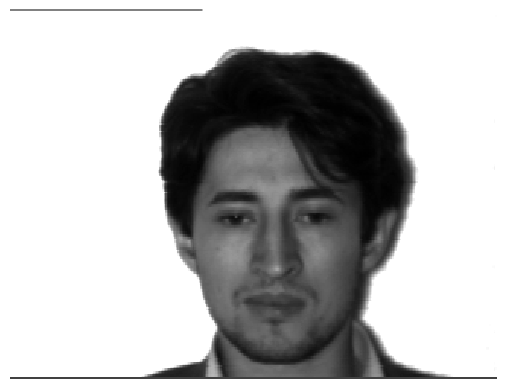

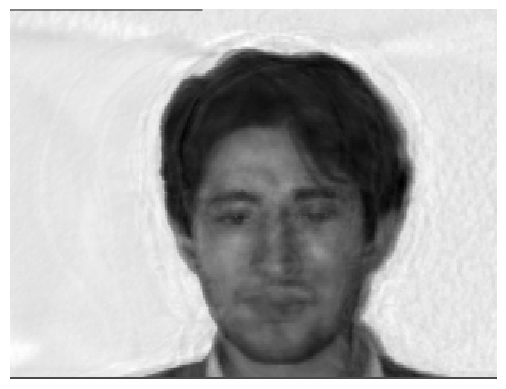

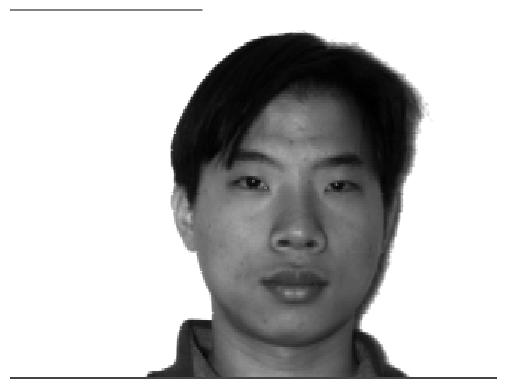

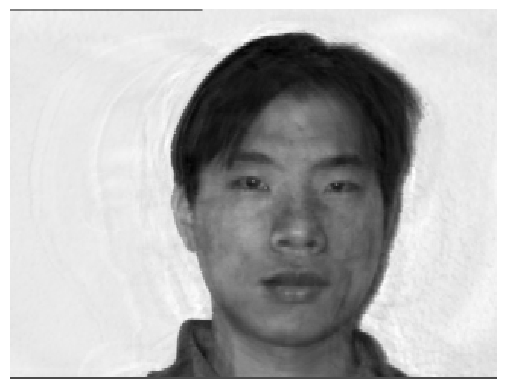

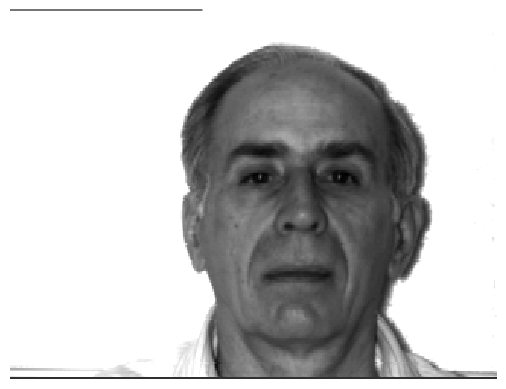

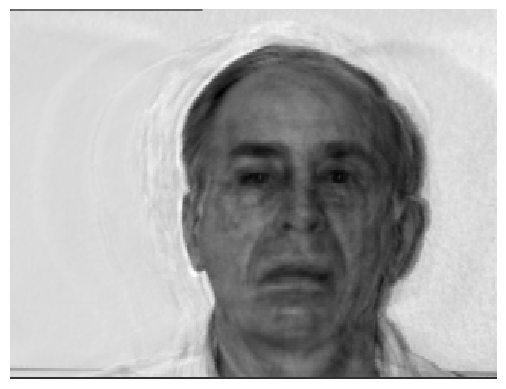

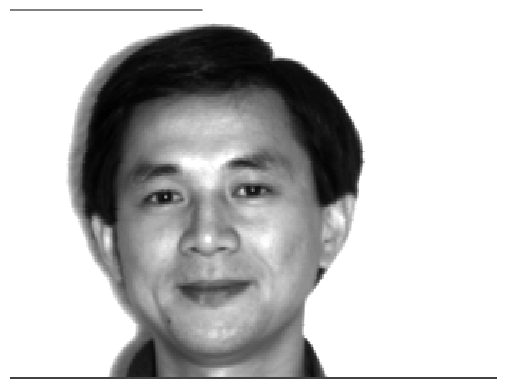

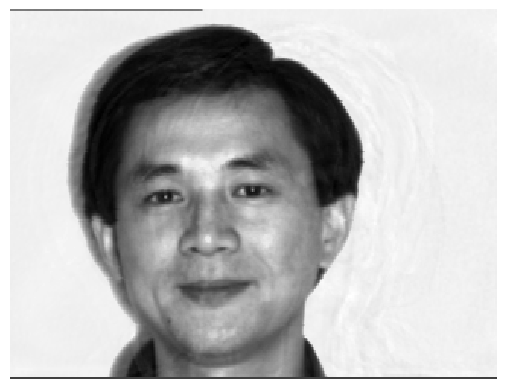

In [20]:
# test results by displaying some images (first 6 people)
for person_id in range(1, 7):
    for state in ['centerlight']:
        # display original images
        fn = fn + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        plt.show()
        
        # display reduced dim. images
        # reshape and subtract mean
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
        z = U.T.dot(x)
        # decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        plt.show()

##### 3. Classification

In [22]:
# self-built method for solving this problem
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [100]:
# get labels from filename
import os

image_labels = []
for fn in os.listdir(fn):
    if fn.endswith('.png'):
        image_labels.append(states.index(fn.split(sep='.')[1]))

Y = np.asarray(image_labels)
Y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

(a) ANN

In [24]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    Z = e_V / e_V.sum(axis=0)
    return Z

# loss fucntion for multiple classes
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat)) / Y.shape[1]

In [38]:
def ann_classifier(X_train, Y_train, eta, max_count, num_layer):
    X, Y = X_train, Y_train
    d0, N = X_train.shape
    C = Y_train.shape[0]
    d1, d2 = num_layer, C

    # initialize parameters randomly
    W1 = 0.01 * np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01 * np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # solve using Gradient Descent
    for i in range(max_count + 1):
        # feedforward
        Z1 = np.dot(W1.T, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)

        # print loss after each 100 iterations
        if i % 100 == 0:
            # compute the loss: average cross-entropy loss
            loss = cost(Y, Yhat)
            print("iter %d, loss: %f" % (i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU
        dW1 = np.dot(X, E1.T)
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # update parameters
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
        
    return W1, W2, b1, b2

def predict(W1, W2, b1, b2, images):
    Z1 = np.dot(W1.T, images) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    return np.argmax(Yhat, axis=0)

In [33]:
# split data into 90% training - 10% validation
M = (int)(Z.shape[1]*0.9)
X_train = Z[:, :M]
Y_train = convert_labels(Y[:M], 11)

print(X_train.shape)
print(Y_train.shape)

(100, 148)
(11, 148)


In [39]:
# train model
eta = 1e-6
max_count = 4000
num_nodes = 400

W1, W2, b1, b2 = ann_classifier(X_train, Y_train, eta, max_count, num_nodes)

iter 0, loss: 43.912871
iter 100, loss: 15.411998
iter 200, loss: 8.579193
iter 300, loss: 5.575375
iter 400, loss: 3.802416
iter 500, loss: 2.582360
iter 600, loss: 1.771948
iter 700, loss: 1.252720
iter 800, loss: 0.900622
iter 900, loss: 0.672148
iter 1000, loss: 0.532036
iter 1100, loss: 0.450226
iter 1200, loss: 0.392533
iter 1300, loss: 0.347767
iter 1400, loss: 0.314376
iter 1500, loss: 0.291216
iter 1600, loss: 0.274361
iter 1700, loss: 0.261207
iter 1800, loss: 0.250061
iter 1900, loss: 0.240632
iter 2000, loss: 0.232383
iter 2100, loss: 0.225107
iter 2200, loss: 0.218593
iter 2300, loss: 0.212735
iter 2400, loss: 0.207648
iter 2500, loss: 0.203079
iter 2600, loss: 0.198983
iter 2700, loss: 0.195220
iter 2800, loss: 0.191608
iter 2900, loss: 0.188255
iter 3000, loss: 0.185207
iter 3100, loss: 0.182293
iter 3200, loss: 0.179506
iter 3300, loss: 0.176894
iter 3400, loss: 0.174481
iter 3500, loss: 0.172243
iter 3600, loss: 0.170118
iter 3700, loss: 0.168105
iter 3800, loss: 0.166

In [43]:
# evaluate
from sklearn.metrics import accuracy_score

Y_pred_train = predict(W1, W2, b1, b2, X_train)
print('accuracy training data:', accuracy_score(Y[:M], Y_pred_train))

# validation set
X_val = Z[:, M:]
Y_val = convert_labels(Y[M:], 11)

Y_pred_val = predict(W1, W2, b1, b2, X_val)
print(X_val.shape, Y_pred_val.shape, 'accuracy validation data: ', accuracy_score(Y[M:], Y_pred_val))
print(Y[M:])
print(Y_pred_val)

accuracy training data: 0.9391891891891891
(100, 17) (17,) accuracy validation data:  0.4117647058823529
[ 5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10]
[ 4  6 10  4 10 10  3  7  7  3  8  5  6  7  8  8  9]


(b) Naive Bayes 

In [49]:
from sklearn.naive_bayes import GaussianNB

# fit model
clf = GaussianNB()
clf.fit(X_train.T, Y[:M].T)

# evaluate
Y_pred_nb = clf.predict(X_train.T)
acc_lr = accuracy_score(Y[:M].T, Y_pred_nb)
print("accuracy training score using Naive Bayes: ", acc_lr)

Y_pred_val_lr = clf.predict(X_val.T)
acc_val_lr = accuracy_score(Y[M:].T, Y_pred_val_lr)
print("accuracy validation score using Naive Bayes: ", acc_val_lr)

print(Y[M:])
print(Y_pred_val_lr)

accuracy training score using Naive Bayes:  0.8175675675675675
accuracy validation score using Naive Bayes:  0.17647058823529413
[ 5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10]
[4 1 0 0 1 2 0 9 0 3 5 6 1 1 8 8 0]


(c) Multinomial Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

# fit model
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=500)
lorg.fit(X_train.T, Y[:M].T)

# predict
Y_pred_lr = lorg.predict(X_train.T)
acc_lr = accuracy_score(Y[:M].T, Y_pred_lr)
print("accuracy training score using Naive Bayes: ", acc_lr)

Y_pred_val_lr = lorg.predict(X_val.T)
acc_val_lr = accuracy_score(Y[M:].T, Y_pred_val_lr)
print("accuracy validation score using Naive Bayes: ", acc_val_lr)

print(Y[M:])
print(Y_pred_val_lr)

accuracy training score using Naive Bayes:  0.9459459459459459
accuracy validation score using Naive Bayes:  0.17647058823529413
[ 5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9 10]
[4 1 0 0 1 2 0 9 0 3 5 6 1 1 8 8 0]


c:\Users\Admin\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Example 1. Iris

In [6]:
import pandas as pd

df = pd.read_csv('iris.data', header=None)
Y = df[4]
Y = Y.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
X = df.iloc[:, :4]
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [107]:
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [128]:
from sklearn.model_selection import train_test_split

Y_lst = np.asarray(Y, dtype=int)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_lst, test_size=.2, random_state=17, stratify=Y)
Y_train_vec = convert_labels(Y_train, 3)
Y_val_vec = convert_labels(Y_val, 3)

print(X_train.shape)
print(X_val.shape)
print(Y_train_vec.shape)
print(Y_val_vec.shape)

(120, 4)
(30, 4)
(3, 120)
(3, 30)


In [68]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    Z = e_V / e_V.sum(axis=0)
    return Z

# loss fucntion for multiple classes
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat)) / Y.shape[1]

In [114]:
def ann_classifier(X_train, Y_train, eta, max_count, num_layer):
    X, Y = X_train, Y_train
    d0, N = X_train.shape
    C = Y_train.shape[0]
    d1, d2 = num_layer, C

    # initialize parameters randomly
    W1 = 0.01 * np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01 * np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # solve using Gradient Descent
    for i in range(max_count + 1):
        # feedforward
        Z1 = np.dot(W1.T, X) + b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)

        # print loss after each 10 iterations
        if i % 1000 == 0:
            # compute the loss: average cross-entropy loss
            loss = cost(Y, Yhat)
            print("iter %d, loss: %f" % (i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU
        dW1 = np.dot(X, E1.T)
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # update parameters
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
        
    return W1, W2, b1, b2

def predict(W1, W2, b1, b2, images):
    Z1 = np.dot(W1.T, images) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    return np.argmax(Yhat, axis=0)

In [139]:
# train model
eta = 0.15
max_count = 10000
num_nodes = 100

W1, W2, b1, b2 = ann_classifier(X_train.T, Y_train_vec, eta, max_count, num_nodes)

iter 0, loss: 1.097308
iter 1000, loss: 0.077588
iter 2000, loss: 0.054620
iter 3000, loss: 0.047485
iter 4000, loss: 0.044651
iter 5000, loss: 0.041076
iter 6000, loss: 0.039045
iter 7000, loss: 0.037523
iter 8000, loss: 0.035648
iter 9000, loss: 0.034543
iter 10000, loss: 0.033265


In [140]:
# evaluate
from sklearn.metrics import accuracy_score

Y_pred_train = predict(W1, W2, b1, b2, X_train.T)
print('accuracy training data:', accuracy_score(Y_train, Y_pred_train))

# validation set

Y_pred_val = predict(W1, W2, b1, b2, X_val.T)
print(X_val.shape, Y_pred_val.shape, 'accuracy validation data: ', accuracy_score(Y_val, Y_pred_val))
print(Y_val)
print(Y_pred_val)

accuracy training data: 0.9916666666666667
(30, 4) (30,) accuracy validation data:  0.9666666666666667
[1 1 2 1 1 0 1 0 1 1 0 1 2 0 2 0 2 1 0 2 0 2 1 0 0 2 2 2 0 2]
[1 1 2 1 1 0 1 0 1 2 0 1 2 0 2 0 2 1 0 2 0 2 1 0 0 2 2 2 0 2]


#### Example 2. Handwritten Digits

In [141]:
# import library
import os
import numpy as np

# define paths
data_path = 'D:/python/pyforml/week04_multinomial-regression/homework'
# train path
train_img_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [142]:
# extract and read data from file
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    import gzip # to decompress gz (zip) file

    # read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # convert into images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [169]:
# call read input method
train_images, train_labels = get_mnist_data(
    train_img_path, train_labels_path, 5000, shuffle=True)

print(train_images.shape, train_labels.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3844\1250645001.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)


(a) Giảm chiều xuống 100

In [162]:
# reduce dimensionality down to d=100
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# fit pca model to data
scaled_images = StandardScaler().fit_transform(train_images)
pca = PCA(n_components=100)
X = pd.DataFrame(pca.fit_transform(scaled_images))
X.shape

(5000, 100)

(b) Phân loại với ANN

In [157]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    Z = e_V / e_V.sum(axis=0)
    return Z

# loss fucntion for multiple classes
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat)) / Y.shape[1]

In [150]:
def ann_classifier(X_train, Y_train, eta, max_count, num_layer):
    X, Y = X_train, Y_train
    d0, N = X_train.shape
    C = Y_train.shape[0]
    d1, d2 = num_layer, C

    # initialize parameters randomly
    W1 = 0.01 * np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01 * np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    # solve using Gradient Descent
    for i in range(max_count + 1):
        # feedforward
        Z1 = np.dot(W1.T, X) + b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)

        # print loss after each 10 iterations
        if i % 1000 == 0:
            # compute the loss: average cross-entropy loss
            loss = cost(Y, Yhat)
            print("iter %d, loss: %f" % (i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU
        dW1 = np.dot(X, E1.T)
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # update parameters
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
        
    return W1, W2, b1, b2

def predict(W1, W2, b1, b2, images):
    Z1 = np.dot(W1.T, images) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    return np.argmax(Yhat, axis=0)

In [168]:
# train model
eta = 1
max_count = 4000
num_nodes = 100

Y = convert_labels(train_labels, 10)

W1, W2, b1, b2 = ann_classifier(X.T, Y, eta, max_count, num_nodes)

iter 0, loss: 2.304703
iter 1000, loss: 0.002074
iter 2000, loss: 0.000784
iter 3000, loss: 0.000460
iter 4000, loss: 0.000319
